## Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Load the data
### https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [3]:
df = pd.read_csv('/Users/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Analysis and Visualization

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

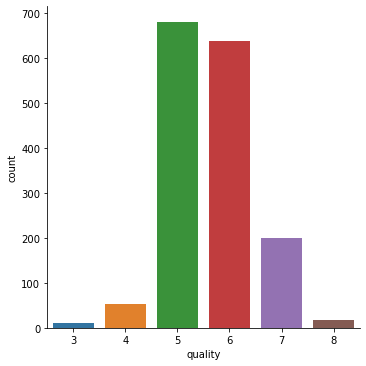

In [7]:
sns.catplot(data=df,x=df.quality,kind='count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

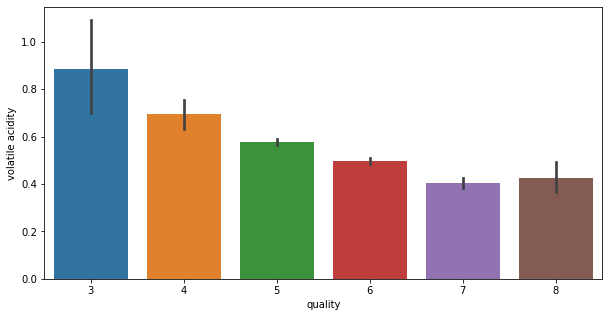

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x = df.quality,y=df['volatile acidity'],data=df)

Lower the "volatile acidity" higher is the "quality"

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

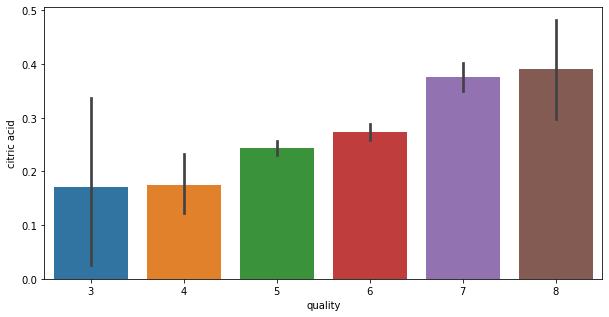

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x = df.quality,y=df['citric acid'],data=df)

Higher the "citric acid" higher is the "quality"

<AxesSubplot:>

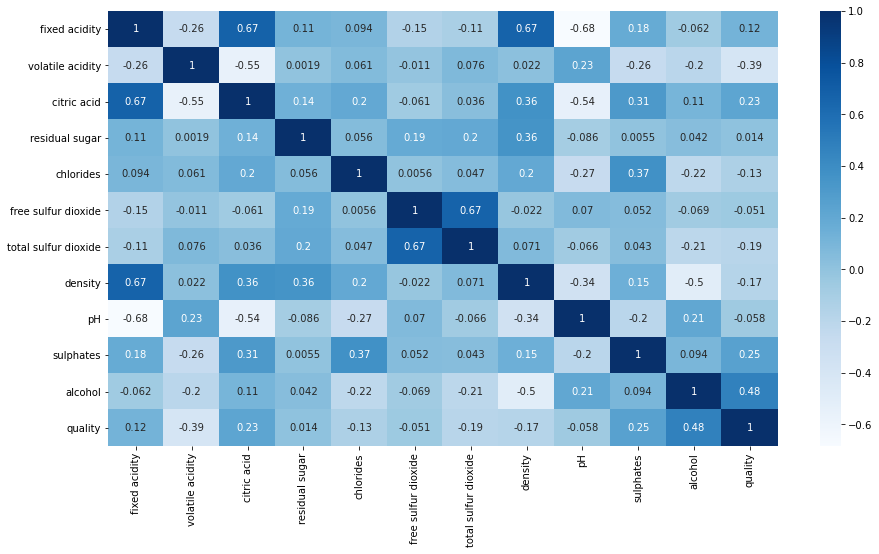

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

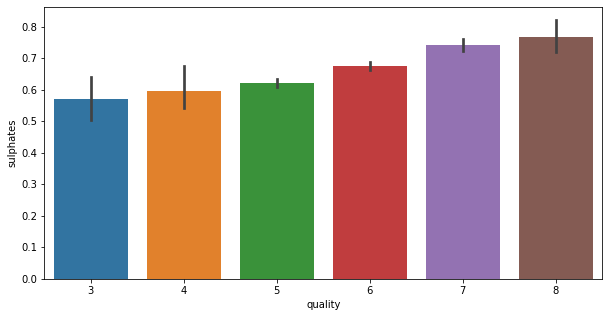

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x = df.quality,y=df['sulphates'],data=df)

Higher the "sulphates" higher is the "quality"

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

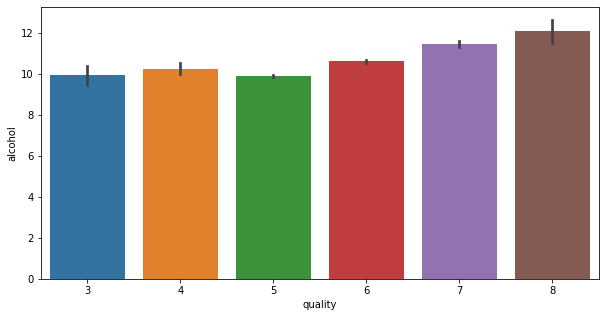

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x = df.quality,y=df['alcohol'],data=df)

## Data preprocessing

In [13]:
X = df.drop(['quality'],axis=1)

## Label Binarization
### If quality is 7 or more consider it as "good" [1] and if quality is 6 or below make it "bad" [0]

In [14]:
y = df['quality'].apply(lambda x: 1 if x>=7 else 0)

Create the split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [16]:
model = RandomForestClassifier()

In [17]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
model.score(X_test,y_test)

0.925

In [19]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

## Building a Predictive System

In [20]:
df[1534:1535]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1534,6.6,0.56,0.14,2.4,0.064,13.0,29.0,0.99397,3.42,0.62,11.7,7


In [21]:
test_input_1 = (6.6,0.56,0.14,2.4,0.064,13.0,29.0,0.99397,3.42,0.62,11.7)

Change the input data as numpy array and reshape the array as we are predicting for only one instance

In [22]:
test_input_1_array = np.asarray(test_input_1)

In [23]:
test_input_1_array_reshaped = test_input_1_array.reshape(1,-1)

In [24]:
test_result_1 = model.predict(test_input_1_array_reshaped)

if test_result_1 == 1:
    print("The quality of the wine is good")
else:
    print("The quality of the wine is bad")

The quality of the wine is good


### Alternative way to input and test data is by directly entering the input as shown below

In [25]:
model.predict([[6.6,0.56,0.14,2.4,0.064,13.0,29.0,0.99397,3.42,0.62,11.7]])

array([1])

In [26]:
if test_result_1 == 1:
    print("The quality of the wine is good")
else:
    print("The quality of the wine is bad")

The quality of the wine is good
